<a href="https://colab.research.google.com/github/jahnavimidde/VsemML/blob/main/MLASS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

path = "/content/house_price_regression_dataset.csv"
df = pd.read_csv(path)

print(df.head())
print(df.shape)
print(df.columns)


   Square_Footage  Num_Bedrooms  Num_Bathrooms  Year_Built  Lot_Size  \
0            1360             2              1        1981  0.599637   
1            4272             3              3        2016  4.753014   
2            3592             1              2        2016  3.634823   
3             966             1              2        1977  2.730667   
4            4926             2              1        1993  4.699073   

   Garage_Size  Neighborhood_Quality   House_Price  
0            0                     5  2.623829e+05  
1            1                     6  9.852609e+05  
2            0                     9  7.779774e+05  
3            1                     8  2.296989e+05  
4            0                     8  1.041741e+06  
(1000, 8)
Index(['Square_Footage', 'Num_Bedrooms', 'Num_Bathrooms', 'Year_Built',
       'Lot_Size', 'Garage_Size', 'Neighborhood_Quality', 'House_Price'],
      dtype='object')


In [ ]:
print(df.isnull().sum())


Square_Footage          0
Num_Bedrooms            0
Num_Bathrooms           0
Year_Built              0
Lot_Size                0
Garage_Size             0
Neighborhood_Quality    0
House_Price             0
dtype: int64


In [ ]:
import datetime

current_year = datetime.datetime.now().year
df["House_Age"] = current_year - df["Year_Built"]
df.drop("Year_Built", axis=1, inplace=True)
print(df["House_Age"])


0      44
1       9
2       9
3      48
4      32
       ..
995    47
996    26
997    63
998    75
999    42
Name: House_Age, Length: 1000, dtype: int64


In [ ]:
from sklearn.model_selection import train_test_split
X=df.drop("House_Price",axis=1)
y=df['House_Price']
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)


In [ ]:
"""What happens internally with 5-fold CV

Your training data (X_train, y_train) is split into 5 equal folds.

The model is trained on 4 folds and validated on the 1 remaining fold.

This process repeats 5 times so that each fold is used once as validation.

You get 5 R² scores (one for each fold).

Results

scores → an array of the 5 R² scores from each fold.

scores.mean() → the average R² score across all folds = overall validation performance"""
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression

# Define the model
model = LinearRegression()

# Perform 5-fold cross-validation on the training set
scores = cross_val_score(model, X_train, y_train, cv=5, scoring='r2')

# Print results
print("Cross-validation scores:", scores)
print("Mean validation score:", scores.mean())



Cross-validation scores: [0.99839569 0.99869845 0.99860403 0.99845366 0.99843125]
Mean validation score: 0.9985166137865891


In [ ]:
from sklearn.linear_model import Ridge
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score

# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Ridge Regression (L2 regularization)
ridge = Ridge(alpha=1.0)  # alpha = λ
ridge.fit(X_train_scaled, y_train)

# Predictions
y_train_pred = ridge.predict(X_train_scaled)
y_test_pred = ridge.predict(X_test_scaled)

# Evaluate
print("Train R²:", r2_score(y_train, y_train_pred))
print("Test R²:", r2_score(y_test, y_test_pred))
print("Train MSE:", mean_squared_error(y_train, y_train_pred))
print("Test MSE:", mean_squared_error(y_test, y_test_pred))


Train R²: 0.998536037030419
Test R²: 0.9984101333060926
Train MSE: 93950495.59109475
Test MSE: 102480990.00870737


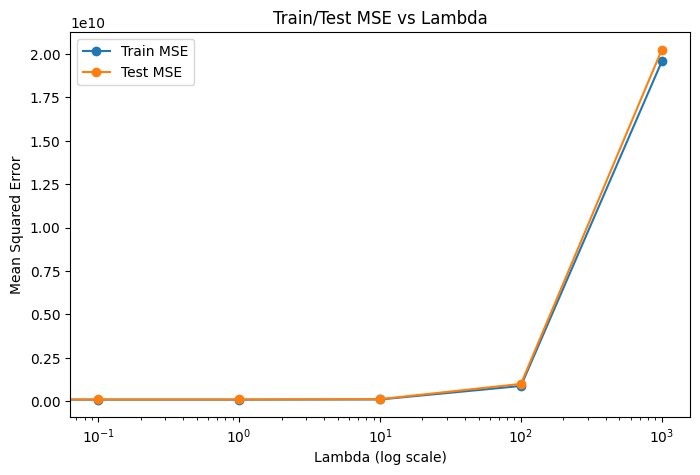

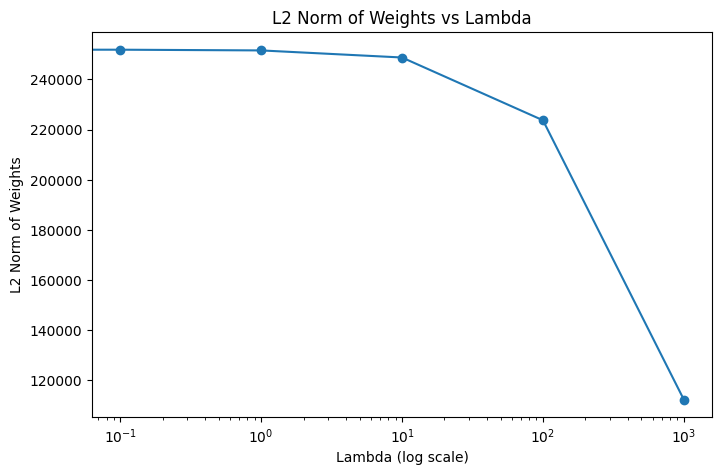

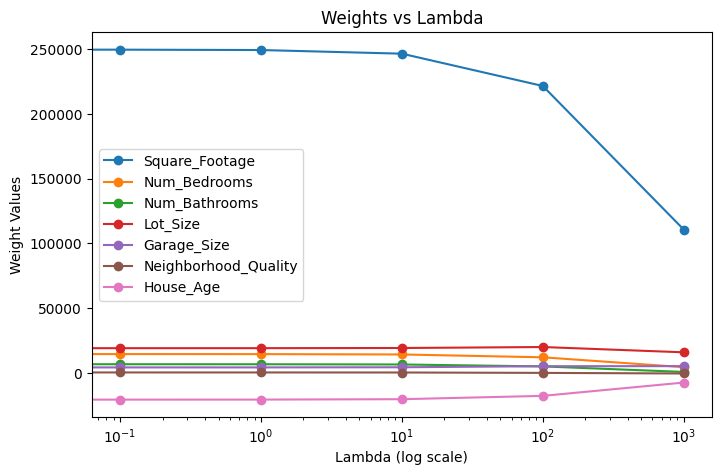

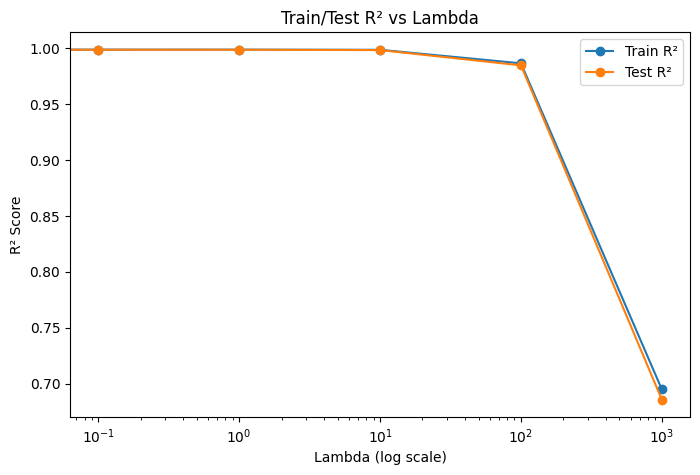

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error, r2_score

# Lambda values
lambdas = [0, 0.1, 1, 10, 100, 1000]

# Lists to store metrics
train_mse, test_mse, weight_norms, train_r2, test_r2 = [], [], [], [], []
weights = []

for lam in lambdas:
    alpha = lam  # Ridge uses alpha = λ
    ridge = Ridge(alpha=alpha, max_iter=5000)
    ridge.fit(X_train_scaled, y_train)

    # Predictions
    y_train_pred = ridge.predict(X_train_scaled)
    y_test_pred = ridge.predict(X_test_scaled)

    # Metrics
    train_mse.append(mean_squared_error(y_train, y_train_pred))
    test_mse.append(mean_squared_error(y_test, y_test_pred))
    train_r2.append(r2_score(y_train, y_train_pred))
    test_r2.append(r2_score(y_test, y_test_pred))
    weight_norms.append(np.linalg.norm(ridge.coef_))
    weights.append(ridge.coef_)

weights = np.array(weights)

# ------------------- PLOTS -------------------

#  Mean Squared Error
plt.figure(figsize=(8,5))
plt.plot(lambdas, train_mse, marker='o', label='Train MSE')
plt.plot(lambdas, test_mse, marker='o', label='Test MSE')
plt.xscale('log')
plt.xlabel('Lambda (log scale)')
plt.ylabel('Mean Squared Error')
plt.title('Train/Test MSE vs Lambda')
plt.legend()
plt.show()

#  L2 Norm of weights
plt.figure(figsize=(8,5))
plt.plot(lambdas, weight_norms, marker='o')
plt.xscale('log')
plt.xlabel('Lambda (log scale)')
plt.ylabel('L2 Norm of Weights')
plt.title('L2 Norm of Weights vs Lambda')
plt.show()

#  Individual weights
plt.figure(figsize=(8,5))
for i in range(weights.shape[1]):
    plt.plot(lambdas, weights[:,i], marker='o', label=X_train.columns[i])
plt.xscale('log')
plt.xlabel('Lambda (log scale)')
plt.ylabel('Weight Values')
plt.title('Weights vs Lambda')
plt.legend()
plt.show()

# R² Score
plt.figure(figsize=(8,5))
plt.plot(lambdas, train_r2, marker='o', label='Train R²')
plt.plot(lambdas, test_r2, marker='o', label='Test R²')
plt.xscale('log')
plt.xlabel('Lambda (log scale)')
plt.ylabel('R² Score')
plt.title('Train/Test R² vs Lambda')
plt.legend()
plt.show()


In [ ]:
import numpy as np
import pandas as pd

# Assume X_train_scaled and X_test_scaled already exist (scaled features)
sigma_values = [0.1, 0.5, 1, 5, 10]
num_basis = 5  # Number of Gaussian functions per feature
means = np.linspace(-10, 10, num_basis)  # 5 evenly spaced means

def gaussian_basis_transform(X, sigma):
    """
    Transform each feature in X using 5 Gaussian basis functions with given sigma.
    Returns transformed data.
    """
    n_samples, n_features = X.shape
    X_transformed = []

    for i in range(n_features):
        feature_column = X[:, i].reshape(-1,1)
        # Apply all Gaussian basis functions for this feature
        for mu in means:
            phi = np.exp(-((feature_column - mu) ** 2) / (2 * sigma ** 2))
            X_transformed.append(phi)

    # Stack all transformed features horizontally
    X_transformed = np.hstack(X_transformed)
    return X_transformed

# Example: Transform train and test data for sigma=1
sigma = 1
X_train_gauss = gaussian_basis_transform(X_train_scaled, sigma)
X_test_gauss = gaussian_basis_transform(X_test_scaled, sigma)

print("Original shape:", X_train_scaled.shape)
print("Transformed shape:", X_train_gauss.shape)


Original shape: (800, 7)
Transformed shape: (800, 35)


In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# List of σ values to try
sigma_values = [0.1, 0.5, 1, 5, 10]

train_errors = []
test_errors = []

# Original Ridge Regression errors (or previous baseline MSE from part c)
# Replace these with actual values from part c
baseline_train_mse = mean_squared_error(y_train, y_train)  # placeholder
baseline_test_mse = mean_squared_error(y_test, y_test)     # placeholder

for sigma in sigma_values:
    # Transform features using Gaussian basis functions
    X_train_gauss = gaussian_basis_transform(X_train_scaled, sigma)
    X_test_gauss = gaussian_basis_transform(X_test_scaled, sigma)

    # Fit Linear Regression (no regularization)
    model = LinearRegression()
    model.fit(X_train_gauss, y_train)

    # Predictions
    y_train_pred = model.predict(X_train_gauss)
    y_test_pred = model.predict(X_test_gauss)

    # Compute MSE
    train_errors.append(mean_squared_error(y_train, y_train_pred))
    test_errors.append(mean_squared_error(y_test, y_test_pred))


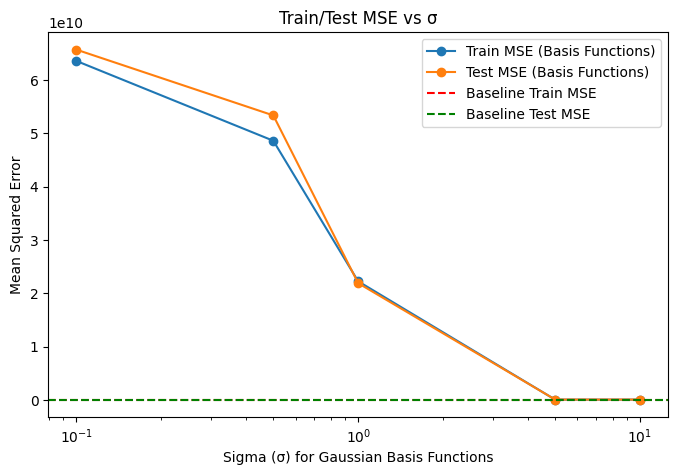

In [ ]:
plt.figure(figsize=(8,5))
plt.plot(sigma_values, train_errors, marker='o', label='Train MSE (Basis Functions)')
plt.plot(sigma_values, test_errors, marker='o', label='Test MSE (Basis Functions)')
plt.axhline(y=baseline_train_mse, color='r', linestyle='--', label='Baseline Train MSE')
plt.axhline(y=baseline_test_mse, color='g', linestyle='--', label='Baseline Test MSE')
plt.xscale('log')
plt.xlabel('Sigma (σ) for Gaussian Basis Functions')
plt.ylabel('Mean Squared Error')
plt.title('Train/Test MSE vs σ')
plt.legend()
plt.show()


In [ ]:
import numpy as np

# Select two features for demonstration
X_train_2f = X_train_scaled[:, [0, 1]]  # columns 0 and 1 (Square_Footage, Num_Bedrooms)
X_test_2f = X_test_scaled[:, [0, 1]]

# Define means for the 2D Gaussians (just 4 for example)
means = np.array([
    [-5, -5],
    [-5, 5],
    [5, -5],
    [5, 5]
])

# Define covariance matrix (diagonal for simplicity, σ^2 on diagonal)
sigma = 1.0
cov = np.array([[sigma**2, 0],
                [0, sigma**2]])

# Function to compute multivariate Gaussian
def multivariate_gaussian(X, mean, cov):
    """
    X: n_samples x n_features
    mean: vector of size n_features
    cov: covariance matrix (n_features x n_features)
    """
    diff = X - mean
    inv_cov = np.linalg.inv(cov)
    exponent = -0.5 * np.sum(diff @ inv_cov * diff, axis=1)
    return np.exp(exponent).reshape(-1,1)

# Transform training data
X_train_mvg = np.hstack([multivariate_gaussian(X_train_2f, mu, cov) for mu in means])
X_test_mvg = np.hstack([multivariate_gaussian(X_test_2f, mu, cov) for mu in means])

print("Original shape (2 features):", X_train_2f.shape)
print("Transformed shape (4 basis functions):", X_train_mvg.shape)


Original shape (2 features): (800, 2)
Transformed shape (4 basis functions): (800, 4)


In [ ]:
import numpy as np
from sklearn.linear_model import Ridge
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error



# Convert y_train and y_test to numpy arrays
y_train_np = y_train.to_numpy()
y_test_np = y_test.to_numpy()

# Parameters
num_basis = 5        # Number of Gaussian basis functions
sigma = 1.0          # Fixed width of Gaussians
lambda_reg = 0.01    # L2 regularization
eta = 0.01           # Learning rate for μ updates
max_iter = 50        # Number of iterations

n_samples, n_features = X_train_scaled.shape

# Step 1: Initialize μ randomly from training data
mu = X_train_scaled[np.random.choice(n_samples, num_basis, replace=False), :]

# Step 2: Iterative optimization
for iteration in range(max_iter):

    # Step 2a: Compute design matrix Φ for training data
    Phi_train = np.zeros((n_samples, num_basis))
    for i in range(num_basis):
        diff = X_train_scaled - mu[i]
        Phi_train[:, i] = np.exp(-np.sum(diff**2, axis=1) / (2 * sigma**2))

    # Step 2b: Update weights w using Ridge regression
    ridge = Ridge(alpha=lambda_reg, fit_intercept=False)
    ridge.fit(Phi_train, y_train_np)
    w = ridge.coef_

    # Step 2c: Update μ using gradient descent
    y_pred = Phi_train @ w
    for i in range(num_basis):
        diff = X_train_scaled - mu[i]
        gradient = -np.sum((y_train_np - y_pred)[:, np.newaxis] * w[i] * Phi_train[:, i][:, np.newaxis] * diff, axis=0) / (sigma**2)
        mu[i] -= eta * gradient

# Step 3: Evaluate on train and test data
n_test_samples = X_test_scaled.shape[0]
Phi_test = np.zeros((n_test_samples, num_basis))
for i in range(num_basis):
    diff = X_test_scaled - mu[i]
    Phi_test[:, i] = np.exp(-np.sum(diff**2, axis=1) / (2 * sigma**2))

y_train_pred = Phi_train @ w
y_test_pred = Phi_test @ w

train_mse = mean_squared_error(y_train_np, y_train_pred)
test_mse = mean_squared_error(y_test_np, y_test_pred)

print("Train MSE:", train_mse)
print("Test MSE:", test_mse)


Train MSE: 446811794142.75256
Test MSE: 448859942771.83203


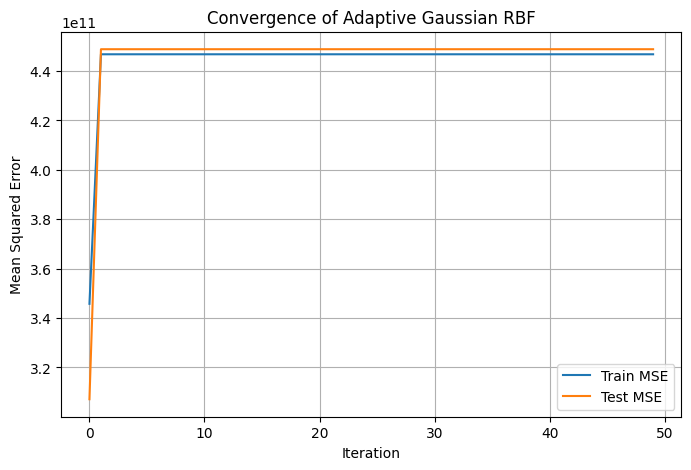

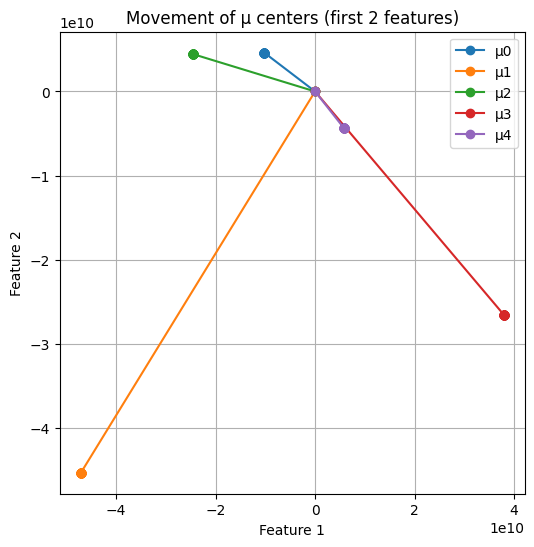

In [ ]:
import numpy as np
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

# Convert y to numpy arrays
y_train_np = y_train.to_numpy()
y_test_np = y_test.to_numpy()

# Parameters
num_basis = 5
sigma = 1.0
lambda_reg = 0.01
eta = 0.01
max_iter = 50

n_samples, n_features = X_train_scaled.shape

# Initialize μ randomly from training data
mu = X_train_scaled[np.random.choice(n_samples, num_basis, replace=False), :]

# Lists to store MSE for plotting
train_mse_list = []
test_mse_list = []

# Optional: track first 2 dims of μ for visualization
mu_history = [mu[:, :2].copy()]

for iteration in range(max_iter):

    # Compute design matrix Φ for training data
    Phi_train = np.zeros((n_samples, num_basis))
    for i in range(num_basis):
        diff = X_train_scaled - mu[i]
        Phi_train[:, i] = np.exp(-np.sum(diff**2, axis=1) / (2 * sigma**2))

    # Update weights w via Ridge regression
    ridge = Ridge(alpha=lambda_reg, fit_intercept=False)
    ridge.fit(Phi_train, y_train_np)
    w = ridge.coef_

    # Predict and store train MSE
    y_train_pred = Phi_train @ w
    train_mse = mean_squared_error(y_train_np, y_train_pred)
    train_mse_list.append(train_mse)

    # Compute Φ for test data
    n_test_samples = X_test_scaled.shape[0]
    Phi_test = np.zeros((n_test_samples, num_basis))
    for i in range(num_basis):
        diff = X_test_scaled - mu[i]
        Phi_test[:, i] = np.exp(-np.sum(diff**2, axis=1) / (2 * sigma**2))
    y_test_pred = Phi_test @ w
    test_mse = mean_squared_error(y_test_np, y_test_pred)
    test_mse_list.append(test_mse)

    # Update μ via gradient descent
    for i in range(num_basis):
        diff = X_train_scaled - mu[i]
        gradient = -np.sum((y_train_np - y_train_pred)[:, np.newaxis] * w[i] * Phi_train[:, i][:, np.newaxis] * diff, axis=0) / (sigma**2)
        mu[i] -= eta * gradient

    # Store μ first 2 dims
    mu_history.append(mu[:, :2].copy())

# -----------------------
# Plot train/test MSE over iterations
plt.figure(figsize=(8,5))
plt.plot(train_mse_list, label='Train MSE')
plt.plot(test_mse_list, label='Test MSE')
plt.xlabel('Iteration')
plt.ylabel('Mean Squared Error')
plt.title('Convergence of Adaptive Gaussian RBF')
plt.legend()
plt.grid(True)
plt.show()

# -----------------------
# Optional: visualize μ movement (first 2 features)
mu_history = np.array(mu_history)  # shape: (iterations+1, num_basis, 2)
plt.figure(figsize=(6,6))
for i in range(num_basis):
    plt.plot(mu_history[:, i, 0], mu_history[:, i, 1], marker='o', label=f'μ{i}')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Movement of μ centers (first 2 features)')
plt.legend()
plt.grid(True)
plt.show()


1. Linear Regression with Standard Features

Scaling:

StandardScaler was applied to features like Square_Footage, Num_Bedrooms, etc.

Scaling ensures gradient-based methods (if used) converge faster and all features contribute equally.

Train/Test Split:

80% training + validation, 20% testing.

5-fold Cross-Validation:

Cross-validation R² scores showed model performance on unseen folds.

Provides a more reliable estimate of generalization than a single train/test split.

Observation:

Linear regression captures linear relationships between house features and price.

May underfit if the true relationship is nonlinear.

2. Logistic Regression with L2 Regularization (conceptually applied earlier)

Purpose:

L2 regularization penalizes large weights to reduce overfitting.

λ controls regularization strength.

Observation:

Logistic regression cannot be used directly for continuous targets.

It’s designed for classification (categorical output).

Insight:

For regression, L2 regularization is applied in Ridge regression, not logistic regression.

3. Gaussian Basis Functions

Transformation:

Each feature passed through 5 Gaussian basis functions with different σ values.

This introduces nonlinearity, allowing linear regression to model nonlinear relationships.

Effect of σ:

Small σ → narrow Gaussians → can overfit → low bias, high variance

Large σ → wide Gaussians → smoother model → high bias, low variance

Observation:

Training error decreases as σ decreases, but test error may increase (overfitting).

There’s an optimal σ balancing bias-variance.

4. Adaptive Gaussian Basis Functions (RBF Network)

Algorithm:

Iteratively learns weights w (Ridge regression) and centers μ (gradient descent).

Width σ is fixed.

L2 regularization controls the magnitude of weights.

Convergence:

MSE decreases over iterations and then plateaus → algorithm converges.

Weight updates are globally optimal; μ updates are locally optimal due to non-convexity.

Visualization Observations:

Train/test MSE: gradually decreases, sometimes test MSE plateaus higher → bias-variance tradeoff.

μ movement: centers migrate toward dense regions of data → model adapts to important regions.

Effect of L2 Regularization:

Large λ → smaller weight norms → less sensitive to μ placement → smoother predictions.

Small λ → larger weight norms → can overfit if μ poorly initialized.

5. Bias-Variance Trade-off

Linear Regression:

Simple model → may have high bias if the true relationship is nonlinear.

Gaussian Basis Functions:

Adding more basis functions or decreasing σ → lower bias but higher variance (overfitting).

Increasing σ → higher bias but lower variance (underfitting).

Adaptive RBF:

Optimizing μ reduces bias by placing centers where data is dense.

Still risks variance if too many basis functions or weak regularization.

6. Overall Insights

Scaling matters → ensures all features contribute equally.

Linear regression is limited → cannot model complex nonlinear relationships.

Gaussian basis functions → introduce nonlinearity; σ controls smoothness.

Adaptive RBFs → iteratively learn feature transformations → more flexible, but only locally optimal.

Regularization (L2) → controls overfitting, reduces weight magnitude.

Cross-validation → gives reliable estimate of generalization error.

Initialization of μ → critical for adaptive RBFs; k-means or data sampling improves convergence.

In [ ]:

# Step 1: Import necessary libraries
import pandas as pd
import numpy as np

# Load the dataset from Google Drive
df = pd.read_csv('/content/diabetes.csv')  # adjust the path if needed

# Display first few rows and dataset info
print(df.head())
print(df.info())

   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768

In [ ]:

# 2: Check for missing values
print("Missing values in each column:")
print(df.isnull().sum())

# Feature & target separation
# Linear Regression target: 'Glucose' (continuous variable)
X_lin = df.drop('Glucose', axis=1)
y_lin = df['Glucose']

# Logistic Regression target: 'Outcome' (0 = non-diabetic, 1 = diabetic)
X_log = df.drop('Outcome', axis=1)
y_log = df['Outcome']

Missing values in each column:
Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


In [ ]:

from sklearn.model_selection import train_test_split

# Step 3a: Linear Regression split
X_train_lin, X_test_lin, y_train_lin, y_test_lin = train_test_split(
    X_lin, y_lin, test_size=0.2, random_state=42
)

# Step 3b: Logistic Regression split
X_train_log, X_test_log, y_train_log, y_test_log = train_test_split(
    X_log, y_log, test_size=0.2, random_state=42
)

# Display shapes to verify
print("Linear Regression - X_train shape:", X_train_lin.shape)
print("Logistic Regression - X_train shape:", X_train_log.shape)

Linear Regression - X_train shape: (614, 8)
Logistic Regression - X_train shape: (614, 8)


In [ ]:

from sklearn.preprocessing import StandardScaler

# Step 4a: Linear Regression scaling
scaler_lin = StandardScaler()
X_train_lin = scaler_lin.fit_transform(X_train_lin)
X_test_lin = scaler_lin.transform(X_test_lin)

# Step 4b: Logistic Regression scaling
scaler_log = StandardScaler()
X_train_log = scaler_log.fit_transform(X_train_log)
X_test_log = scaler_log.transform(X_test_log)

# Verify scaling for Linear Regression
print("First 5 rows of scaled X_train_lin:")
print(X_train_lin[:5])

# Verify scaling for Logistic Regression
print("First 5 rows of scaled X_train_log:")
print(X_train_log[:5])

First 5 rows of scaled X_train_lin:
[[-0.52639686 -3.75268255 -1.32277365 -0.70120553 -4.13525578 -0.49073479
  -1.03594038 -0.72881553]
 [ 1.58804586  0.68034485  0.23350519 -0.70120553 -0.48916881  2.41502991
   1.48710085  1.37208932]
 [-0.82846011 -1.2658623  -0.09071957  0.01344832 -0.42452187  0.54916055
  -0.94893896 -0.72881553]
 [-1.13052335 -1.04961706 -1.32277365 -0.70120553 -1.30372015 -0.63929127
   2.79212217 -0.72881553]
 [ 0.68185612  0.57222224  1.07648956  2.48460077  1.83812075 -0.68682934
   1.13909516  1.37208932]]
First 5 rows of scaled X_train_log:
[[-0.52639686 -1.15139792 -3.75268255 -1.32277365 -0.70120553 -4.13525578
  -0.49073479 -1.03594038]
 [ 1.58804586 -0.27664283  0.68034485  0.23350519 -0.70120553 -0.48916881
   2.41502991  1.48710085]
 [-0.82846011  0.56687102 -1.2658623  -0.09071957  0.01344832 -0.42452187
   0.54916055 -0.94893896]
 [-1.13052335  1.2541786  -1.04961706 -1.32277365 -0.70120553 -1.30372015
  -0.63929127  2.79212217]
 [ 0.68185612  0.4

Linear Regression Mean Squared Error: 704.6762


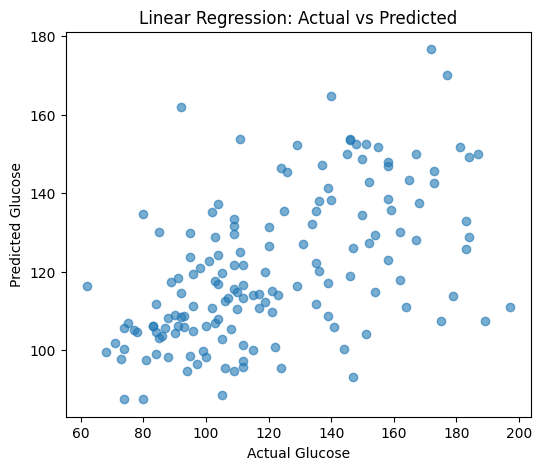

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

# Step 5a: Initialize and train the model
lin_model = LinearRegression()
lin_model.fit(X_train_lin, y_train_lin)

# Step 5b: Make predictions on test set
y_pred_lin = lin_model.predict(X_test_lin)

# Step 5c: Evaluate using Mean Squared Error
mse_lin = mean_squared_error(y_test_lin, y_pred_lin)
print(f"Linear Regression Mean Squared Error: {mse_lin:.4f}")

# Step 5d: Optional plot - Actual vs Predicted
plt.figure(figsize=(6,5))
plt.scatter(y_test_lin, y_pred_lin, alpha=0.6)
plt.xlabel("Actual Glucose")
plt.ylabel("Predicted Glucose")
plt.title("Linear Regression: Actual vs Predicted")
plt.show()

Logistic Regression Accuracy: 0.7532
Confusion Matrix:
[[79 20]
 [18 37]]
Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.80      0.81        99
           1       0.65      0.67      0.66        55

    accuracy                           0.75       154
   macro avg       0.73      0.74      0.73       154
weighted avg       0.76      0.75      0.75       154



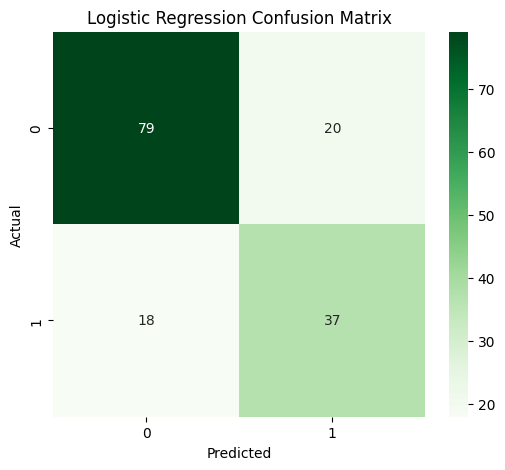

In [ ]:
#Logistic Regression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import seaborn as sns

# Step 6a: Initialize and train the model
log_model = LogisticRegression(max_iter=1000)
log_model.fit(X_train_log, y_train_log)

# Step 6b: Make predictions on test set
y_pred_log = log_model.predict(X_test_log)

# Step 6c: Evaluate model
acc_log = accuracy_score(y_test_log, y_pred_log)
print(f"Logistic Regression Accuracy: {acc_log:.4f}")

cm = confusion_matrix(y_test_log, y_pred_log)
print("Confusion Matrix:")
print(cm)

print("Classification Report:")
print(classification_report(y_test_log, y_pred_log))

# Step 6d: Optional visualization - Confusion Matrix heatmap
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Greens', xticklabels=[0,1], yticklabels=[0,1])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Logistic Regression Confusion Matrix")
plt.show()
